In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the data
file_path = "fic_epita_kantar_codes.csv"
data = pd.read_csv(file_path, sep=';')

# Define Orange and Green variable groups
orange_vars = [
    "A9_1_slice", "A9_2_slice", "A9_3_slice", "A9_4_slice", "A9_5_slice",
    "A9_6_slice", "A9_7_slice", "A9_8_slice", "A9_9_slice", "A9_10_slice",
    "A9_11_slice", "A9_12_slice", "A9_13_slice", "A9_14_slice", "A9_15_slice",
    "A9_16_slice", "A10_1_slice", "A10_2_slice", "A10_3_slice", "A10_4_slice",
    "A10_5_slice", "A10_6_slice", "A10_7_slice", "A10_8_slice",
    "A11_1_slice", "A11_2_slice", "A11_3_slice", "A11_4_slice", "A11_5_slice",
    "A11_6_slice", "A11_7_slice", "A11_8_slice", "A11_9_slice", "A11_10_slice",
    "A11_11_slice", "A11_12_slice", "A11_13_slice"
]
green_vars = [
    "A11_1_slice", "A12", "A13", "A14", "A4", "A5", "A5bis", "A8_1_slice",
    "A8_2_slice", "A8_3_slice", "A8_4_slice", "B1_1_slice", "B1_2_slice",
    "B2_1_slice", "B2_2_slice", "B3", "B4", "B6", "C1_1_slice", "C1_2_slice",
    "C1_3_slice", "C1_4_slice", "C1_5_slice", "C1_6_slice", "C1_7_slice",
    "C1_8_slice", "C1_9_slice"
]
specific_vars = [
    "rs3", "rs5", "rs6", "RS1", "RS191", "RS192", "RS193", "RS102RECAP",
    "rs11recap2", "RS11recap", "RS193bis", "RS2Recap", "RS56Recap",
    "RS2", "RS11", "RS102"
]


In [2]:
# Fill missing values in Orange variables
orange_data = data[orange_vars].fillna(0)

# Perform KMeans clustering with a chosen number of clusters (e.g., 3 groups)
kmeans_orange = KMeans(n_clusters=3, random_state=42)
data['cluster_orange'] = kmeans_orange.fit_predict(orange_data)


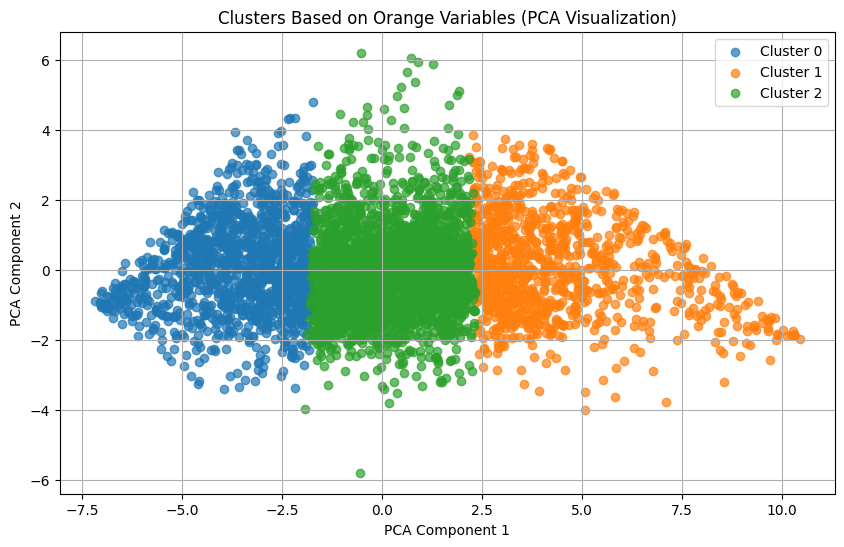

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions of Orange data to 2D for visualization
pca = PCA(n_components=2)
orange_data_2d = pca.fit_transform(orange_data)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster_label in set(data['cluster_orange']):
    cluster_points = orange_data_2d[data['cluster_orange'] == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_label}', alpha=0.7)

plt.title("Clusters Based on Orange Variables (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()
plt.show()


In [3]:
# Extract features (Green variables) and target (Orange clusters)
X_green = data[green_vars].fillna(0)
y_orange = data['cluster_orange']

# Split data into training and test sets
X_train_green, X_test_green, y_train, y_test = train_test_split(
    X_green, y_orange, test_size=0.2, random_state=42
)

# Train a Random Forest classifier
rf_green = RandomForestClassifier(random_state=42)
rf_green.fit(X_train_green, y_train)

# Predict and evaluate
y_pred_green = rf_green.predict(X_test_green)
print("Classification Report (Green Variables):\n", classification_report(y_test, y_pred_green))


Classification Report (Green Variables):
               precision    recall  f1-score   support

           0       0.76      0.65      0.70       257
           1       0.73      0.58      0.65       207
           2       0.72      0.82      0.77       536

    accuracy                           0.73      1000
   macro avg       0.74      0.69      0.71      1000
weighted avg       0.73      0.73      0.73      1000



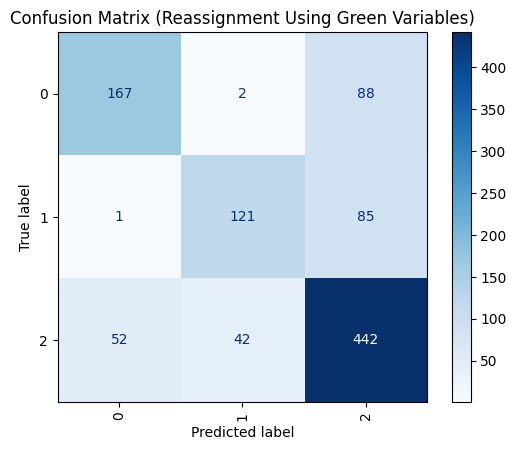

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_green)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_green.classes_)
disp.plot(cmap="Blues", xticks_rotation="vertical")
plt.title("Confusion Matrix (Reassignment Using Green Variables)")
plt.show()


In [4]:
# Extract features (Specific variables) and target (Orange clusters)
X_specific = data[specific_vars].fillna(0)

# Split data into training and test sets
X_train_specific, X_test_specific, y_train, y_test = train_test_split(
    X_specific, y_orange, test_size=0.2, random_state=42
)

# Train a Random Forest classifier
rf_specific = RandomForestClassifier(random_state=42)
rf_specific.fit(X_train_specific, y_train)

# Predict and evaluate
y_pred_specific = rf_specific.predict(X_test_specific)
print("Classification Report (Specific Variables):\n", classification_report(y_test, y_pred_specific))


Classification Report (Specific Variables):
               precision    recall  f1-score   support

           0       0.30      0.28      0.29       257
           1       0.24      0.17      0.20       207
           2       0.53      0.60      0.56       536

    accuracy                           0.43      1000
   macro avg       0.35      0.35      0.35      1000
weighted avg       0.41      0.43      0.42      1000



In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Extract features (Specific variables) and target (Orange clusters)
X_specific = data[specific_vars].fillna(0)

# Split data into training and test sets
X_train_specific, X_test_specific, y_train, y_test = train_test_split(
    X_specific, y_orange, test_size=0.2, random_state=42
)

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees
    'max_depth': [None, 10, 20, 30],      # Maximum depth of trees
    'min_samples_split': [2, 5, 10],      # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],        # Minimum samples in a leaf node
    'bootstrap': [True, False]            # Whether to bootstrap samples
}

# Initialize a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV to optimize hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='accuracy', cv=3, verbose=2, n_jobs=-1)

# Fit the GridSearchCV on training data
grid_search.fit(X_train_specific, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# Train the optimized Random Forest with best parameters
rf_optimized = RandomForestClassifier(**best_params, random_state=42)
rf_optimized.fit(X_train_specific, y_train)

# Predict and evaluate
y_pred_specific_optimized = rf_optimized.predict(X_test_specific)
print("Classification Report (Specific Variables with Hyperparameter Optimization):\n",
      classification_report(y_test, y_pred_specific_optimized))


Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time